<a href="https://colab.research.google.com/github/wjoonkim/tutorials/blob/main/behi5003_fall2025/homework1/BEHI5003_HW1_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BEHI 5003
## Tutorial: Homework 1
### Author: Won Joon Kim
### Affiliation: Biomolecular Engineering Lab (BEL), CBE, HKUST

I acknowledge the use of generative AI (Gemini Agent in Colab) in writing the code below.

This notebook is a revision of the Jupyter notebook authored by Mr. Mingyi Sun (BEL, CBE, HKUST) during the Fall 2024 offering of BIEN 6930B (this course).

I sincerely thank the authors and maintainers of the packages used in this tutorial!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
from IPython.display import display, clear_output

# Background to Metropolis Monte Carlo simulation


### Monte Carlo simulation example: Coin Flip
For a more theoretical background, you may refer to this [Wikipedia page](https://en.wikipedia.org/wiki/Monte_Carlo_method) or this [YouTube video](https://www.youtube.com/watch?v=r7cn3WS5x9c).

As you are already aware, we associate coin flips as being "fair",\
i.e., the chances of getting a head or a tail are (approximately) equal (0.5).

But can the computer, without being told that this is actually the case, elude this result independently?

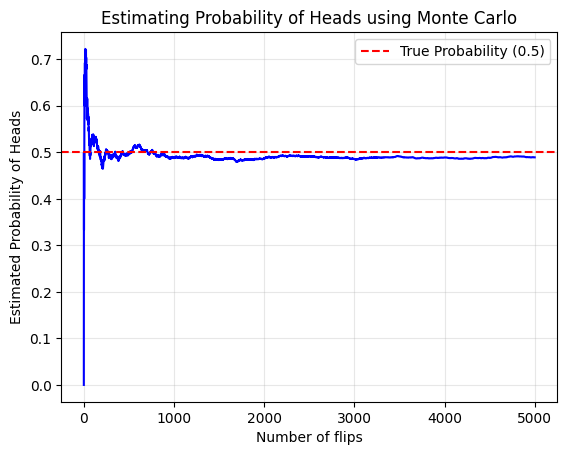

Final results:
Number of flips: 5000
Number of heads: 2446
Estimated probability of heads: 0.4892


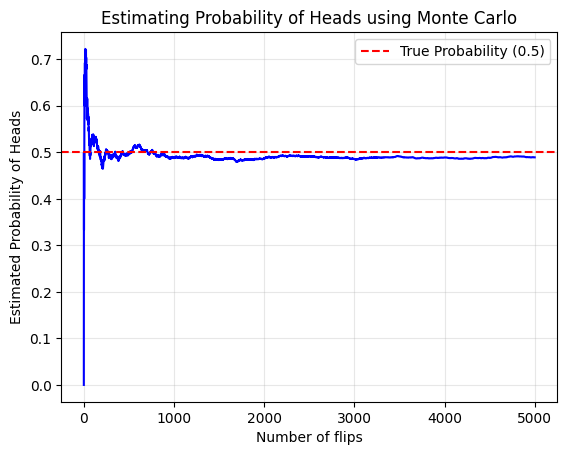

In [ ]:
# Number of coin flips to simulate
num_flips = 5000

# Counter for heads
heads_count = 0

# Lists to store iteration number and estimated probability of heads for plotting
iterations = []
estimated_probabilities = []

# Set up the plot
plt.xlabel('Number of flips')
plt.ylabel('Estimated Probability of Heads')
plt.title('Estimating Probability of Heads using Monte Carlo')
plt.axhline(0.5, color='red', linestyle='--', label='True Probability (0.5)') # Add a line for the true probability
plt.grid(True, alpha=0.3)
plt.legend()


# Simulate coin flips
for i in range(1, num_flips + 1):
    # Generate a random number between 0 and 1 from the standard normal distribution
    random_number = random.random()

    # If the number is less than 0.5, consider it heads (you can define heads as > 0.5 as well)
    if random_number < 0.5:
        heads_count += 1

    # Calculate the estimated probability of heads at the current iteration
    current_probability = heads_count / i

    # Store the data for plotting
    iterations.append(i)
    estimated_probabilities.append(current_probability)

    # Update the plot every 50 flips (or adjust as needed)
    if i % 100 == 0 or i == num_flips:
        plt.plot(iterations, estimated_probabilities, color='blue')
        plt.axhline(0.5, color='red', linestyle='--', label='True Probability (0.5)')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.xlabel('Number of flips')
        plt.ylabel('Estimated Probability of Heads')
        plt.title('Estimating Probability of Heads using Monte Carlo')
        clear_output(wait=True) # Clear the previous output
        display(plt.gcf()) # Display the current figure
        plt.cla()



# show results
print("Final results:")
print(f"Number of flips: {num_flips}")
print(f"Number of heads: {heads_count}")
print(f"Estimated probability of heads: {current_probability}")
# After the loop, make sure the final plot is displayed
plt.plot(iterations, estimated_probabilities, color='blue')
plt.axhline(0.5, color='red', linestyle='--', label='True Probability (0.5)')
plt.xlabel('Number of flips')
plt.ylabel('Estimated Probability of Heads')
plt.title('Estimating Probability of Heads using Monte Carlo')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Metropolis Monte Carlo simulation example: 1D Random Walk with a Potential
For a more theoretical background, you may refer to this [Wikipedia page](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) or [YouTube video](https://www.youtube.com/watch?v=Jr1GdNI3Vfo).

Comments have been added to the code for explanation of each step.

In [ ]:
# Define the potential function (e.g., a simple quadratic potential)
# Think of this as the "hilly landscape" - the potential function tells us the "height" at any given "position".
def potential(x):
    return x**2

#@markdown Number of Monte Carlo steps (how many steps we take in our search)
n_steps = 5000  #@param {type:"raw"}

#@markdown Temperature parameter (kT) - this influences how likely we are to accept moves that go uphill.
kT = 0.5 #@param {type:"raw"}
#@markdown - A higher temperature means we are more likely to accept uphill moves, allowing us to explore more.
#@markdown - A lower temperature means we are less likely to accept uphill moves, making us more likely to settle in a low point.

#@markdown Initial position (where we start our search in the landscape)
current_position = 5.0 #@param {type:"raw"}

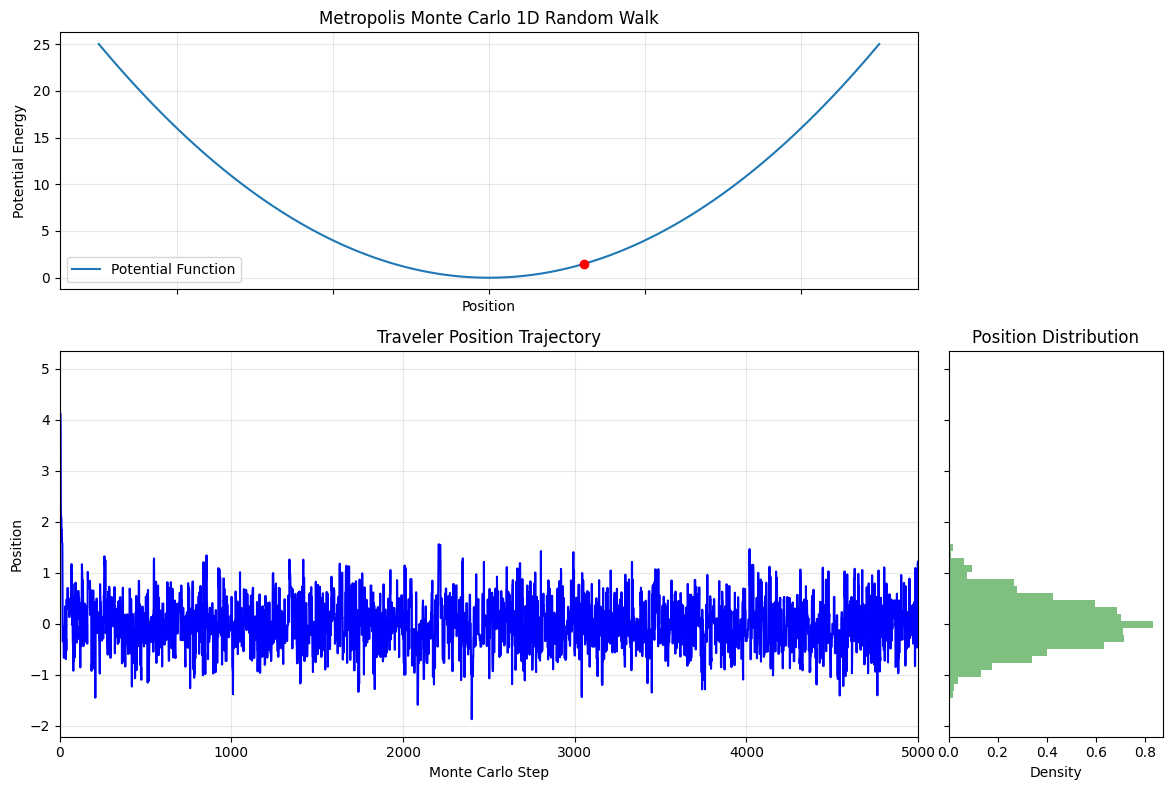

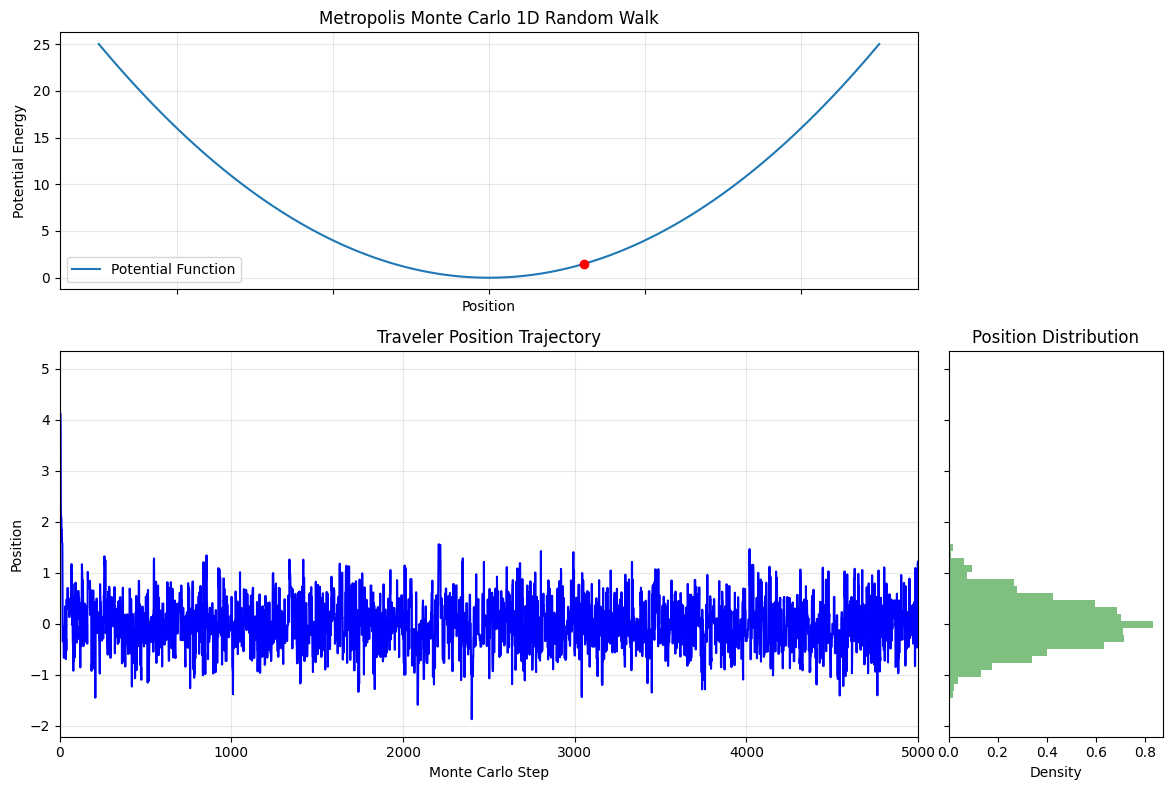

In [ ]:
# List to store the history of positions for the trajectory plot and marginal histogram
position_history = [current_position]

# Set up the plots (two subplots and a marginal axis)
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 2, width_ratios=[4, 1], height_ratios=[2, 3]) # Define grid for subplots with ratios - increased height of the first row

# Plot 1: Traveler on the Potential Function (Top-left)
ax1 = fig.add_subplot(gs[0, 0])
x_values = np.linspace(-5, 5, 100) # Generate x values to plot the potential
ax1.plot(x_values, potential(x_values), label='Potential Function')
ax1.set_xlabel('Position')
ax1.set_ylabel('Potential Energy')
ax1.set_title('Metropolis Monte Carlo 1D Random Walk')
ax1.grid(True, alpha=0.3)
ax1.legend()
# Create a point to represent the traveler
traveler_point, = ax1.plot([current_position], [potential(current_position)], 'ro') # 'ro' for red circle

# Plot 2: Position Trajectory (Bottom-left)
ax2 = fig.add_subplot(gs[1, 0]) # Removed sharex=ax1
ax2.set_xlabel('Monte Carlo Step')
ax2.set_ylabel('Position')
ax2.set_title('Traveler Position Trajectory')
ax2.grid(True, alpha=0.3)
trajectory_line, = ax2.plot(position_history, color='blue')
plt.setp(ax1.get_xticklabels(), visible=False) # Hide x-axis labels on the top plot

# Plot 3: Marginal Histogram of Positions (Bottom-right)
ax3 = fig.add_subplot(gs[1, 1], sharey=ax2) # Share y-axis with the trajectory plot
ax3.set_xlabel('Frequency')
ax3.set_title('Position Distribution')
plt.setp(ax3.get_yticklabels(), visible=False) # Hide y-axis labels on the marginal plot


plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

# Metropolis Monte Carlo simulation
for step in range(n_steps):
    # Propose a new position (random walk step)
    # We randomly suggest moving to a new spot in the landscape.
    # Propose a move by adding a random number from a normal distribution - this determines how big and in what direction our proposed step is.
    proposed_position = current_position + random.gauss(0, 1)

    # Calculate the potential energy at the current and proposed positions
    # We find out the "height" of our current spot and the "height" of the proposed new spot.
    current_energy = potential(current_position)
    proposed_energy = potential(proposed_position)

    # Calculate the change in energy
    # We see if the proposed move goes uphill (positive dE) or downhill (negative dE).
    delta_E = proposed_energy - current_energy

    # Metropolis acceptance criterion
    # This is the rule for deciding whether to move to the proposed spot.
    # Calculate the probability of accepting the proposed move
    # If the energy decreases (delta_E < 0), P_accept is min(exp(-negative/kT), 1) which is 1 - we always accept moves that go downhill.
    # If the energy increases (delta_E >= 0), P_accept is exp(-positive/kT) - we might accept uphill moves, but the probability is lower for larger uphill steps and lower temperatures.
    P_accept = min(1, np.exp(-delta_E / kT))

    # Accept or reject the proposed move
    # We generate a random number and compare it to the acceptance probability.
    # Generate a random number between 0 and 1
    random_accept = random.random()
    # If the random number is less than P_accept, accept the move - if our random chance is less than the probability of accepting, we move.
    if random_accept < P_accept:
        current_position = proposed_position # We move to the new position

    # Store the current position for the trajectory plot and marginal histogram
    position_history.append(current_position)

    # Update the plots every 100 steps (or adjust as needed)
    if step % 100 == 0 or step == n_steps - 1:
        # Update traveler position on the first plot
        traveler_point.set_data([current_position], [potential(current_position)])

        # Update trajectory on the second plot
        trajectory_line.set_data(range(len(position_history)), position_history)
        ax2.set_xlim(0, len(position_history)) # Adjust x-axis limit of trajectory plot
        #ax2.set_ylim(min(position_history) - 0.5, max(position_history) + 0.5) # Adjust y-axis limit - removed because sharing y-axis with marginal plot

        # Update the marginal histogram
        ax3.cla() # Clear the previous histogram
        ax3.hist(position_history, bins=50, orientation='horizontal', density=True, color='green', alpha=0.5)
        ax3.set_xlabel('Density')
        ax3.set_title('Position Distribution')
        plt.setp(ax3.get_yticklabels(), visible=False)


        clear_output(wait=True)
        display(fig) # Display the entire figure with both subplots and marginal

From the marginal density histogram (green) on the right of the bottom subplot, we can observe that the original normal distribution can be "regenerated" from the trajectory of the traveler!

This again reinforces the law of large numbers!

# Part A: Utilize Metropolis Monte Carlo simulation to explore sequence space
$ P(\text{sequence}|\text{structure}) $, i.e., inverse folding

## Structure 1

First, let's import the condition matrix we have made (e.g., in Excel) by observing the 2 structures given in the Problem Set.

NOTE: It is easier for any programming language to read CSV (`.csv`) files than Excel (`.xlsx` or `.xls`) files. You can export any (well-formatted) Excel spreadsheet as CSV files, and can be opened on any text editor (e.g., Notepad on Windows).

In [14]:
condition_matrix_structure1_df = pd.read_csv('condition_matrix_structure1.csv')
display(condition_matrix_structure1_df)

,position,identity,nearest_neighbor,num_NN,solvation_molecule
0,1,H,"4,14",2,1
1,2,H,NaN,0,2
2,3,H,NaN,0,2
3,4,H,"1,15",2,0
4,5,H,16,1,1
5,6,H,17,1,1
6,7,H,NaN,0,2
7,8,H,17,1,1
8,9,H,NaN,0,2
9,10,H,17,1,1


`identity` of all amino acid residues is initialized as hydrophobic (H). This is not too important, as it will be updated during the simulation by the Monte Carlo (MC) algorithm.

In [15]:
def create_h_matrix(df):
    """
    Converts a DataFrame containing nearest neighbor information into an H matrix.

    Args:
        df (pd.DataFrame): DataFrame with 'position' and 'nearest_neighbor' columns.

    Returns:
        np.ndarray: The H matrix representing nearest neighbor interactions.
    """
    n = len(df)
    h_matrix = np.zeros((n, n), dtype=int)
    for index, row in df.iterrows():
        position = row['position'] - 1  # Adjust for 0-based indexing
        neighbors = row['nearest_neighbor']
        if pd.notna(neighbors):
            neighbor_list = [int(x) - 1 for x in neighbors.split(',')] # Adjust for 0-based indexing
            for neighbor in neighbor_list:
                h_matrix[position, neighbor] = 1
    return h_matrix

In [16]:
h_matrix_structure1 = create_h_matrix(condition_matrix_structure1_df)
print(h_matrix_structure1)

[[0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0]]


We can see that this matrix is indeed symmetrical! This validates the equation given in the Problem set.

In [17]:
def create_s_array(df):
    """
    Creates an S array based on the 'solvation_molecule' column in the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame with 'solvation_molecule' column.

    Returns:
        np.ndarray: The S array representing solvation entropy.
    """
    # If solvation_molecule is greater than 0, the value in the S array is 1, otherwise 0.
    return (df['solvation_molecule'] > 0).astype(int).values

In [18]:
s_matrix_structure1 = create_s_array(condition_matrix_structure1_df)
print(s_matrix_structure1)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0]


In [19]:
def run_monte_carlo(H, S, n_iterations=500, kT=0.5):
    """
    Runs a Metropolis Monte Carlo simulation to find the minimum energy sequence.

    Args:
        H (np.ndarray): The H matrix representing nearest neighbor interactions.
        S (np.ndarray): The S array representing solvation entropy.
        n_iterations (int): The number of Monte Carlo iterations.
        kT (float): Boltzmann constant * Temperature.

    Returns:
        tuple: A tuple containing:
            - list: List of energy values at each accepted iteration.
            - np.ndarray: The final sequence found.
    """
    n = H.shape[0] # Get the number of positions from the H matrix

    # Initial amino acid sequence (all polar - 0)
    v = np.zeros(n, dtype=int)

    # Initialize energy and sequence arrays to store results
    E = [] # To store energy at each accepted step
    V = [] # To store the sequence at each accepted step

    # Calculate and store the initial energy and sequence
    E.append(-np.sum((v @ H) * v) + np.sum(v * S))
    V.append(v.copy())

    # Monte Carlo simulation loop
    ctr = 1 # Counter for accepted iterations
    while ctr < n_iterations:
        # Randomly select a position in the sequence to flip
        loc = random.randint(0, n - 1)
        v_new = v.copy() # Create a copy of the current sequence
        v_new[loc] = not v_new[loc] # Flip the amino acid at the selected position (0 to 1 or 1 to 0)

        # Calculate the energy of the new sequence
        E_temp = -np.sum((v_new @ H) * v_new) + np.sum(v_new * S)

        # Calculate the change in energy
        dE = E_temp - E[-1]

        # Metropolis acceptance criteria
        # Calculate the probability of accepting the new state
        P_accept = min(np.exp(-dE / kT), 1)
        # Determine if the move is accepted based on the probability
        accept = random.random() < P_accept

        # If the new state is accepted
        if accept:
            ctr += 1 # Increment the accepted iteration counter
            E.append(E_temp) # Append the new energy to the energy list
            V.append(v_new.copy()) # Append the new sequence to the sequence list
            v = v_new # Update the current sequence to the new sequence
        # If the new state is not accepted, the current state (v) remains the same,
        # and we don't append to E and V, effectively staying at the previous state for the next iteration.

    return E, v # Return the list of energies and the final sequence

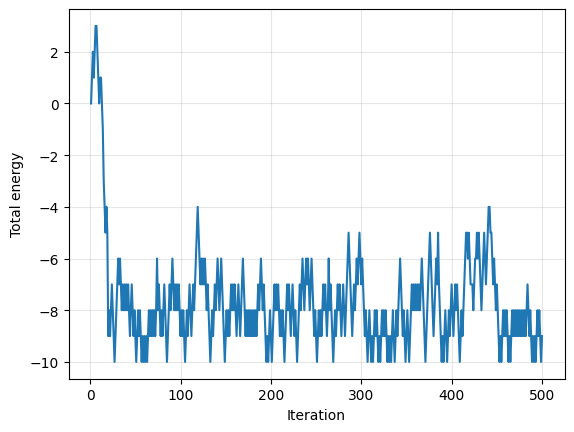

Final sequence: [1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1] or HPPHHHPPPHHHPHHHH
Final energy: -9
Minimum energy: -10


In [27]:
# run function; change n_iterations to your liking
E_structure1, v_structure1 = run_monte_carlo(h_matrix_structure1, s_matrix_structure1, n_iterations=500)

# Plot results
plt.plot(range(1, len(E_structure1) + 1), E_structure1)
plt.xlabel('Iteration')
plt.ylabel('Total energy')
plt.grid(True, alpha=0.3)
plt.show()

# Print results
print(f"Final sequence: {v_structure1} or {''.join(['H' if x else 'P' for x in v_structure1])}")
print(f"Final energy: {E_structure1[-1]}")
print(f"Minimum energy: {min(E_structure1)}")

Feel free to change `n_iterations` to see what happens when you shorten/lengthen the simulation!

## Structure 2
You can use the functions defined previously to ease through the identical operations that have to be performed for structure 2!

This is exactly why writing functions is a good habit; it allows reusability of your code!

In [28]:
condition_matrix_structure2_df = pd.read_csv('condition_matrix_structure2.csv')
display(condition_matrix_structure2_df)

,position,identity,nearest_neighbor,num_NN,solvation_molecule
0,1,H,"4,6",2,1
1,2,H,NaN,0,2
2,3,H,NaN,0,2
3,4,H,"1,17",2,0
4,5,H,"12,14",2,0
5,6,H,"1,9",2,0
6,7,H,NaN,0,2
7,8,H,NaN,0,2
8,9,H,"6,12",2,0
9,10,H,NaN,0,2


In [29]:
h_matrix_structure2 = create_h_matrix(condition_matrix_structure2_df)
print(h_matrix_structure2)

[[0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]]


In [30]:
s_matrix_structure2 = create_s_array(condition_matrix_structure2_df)
print(s_matrix_structure2)

[1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1]


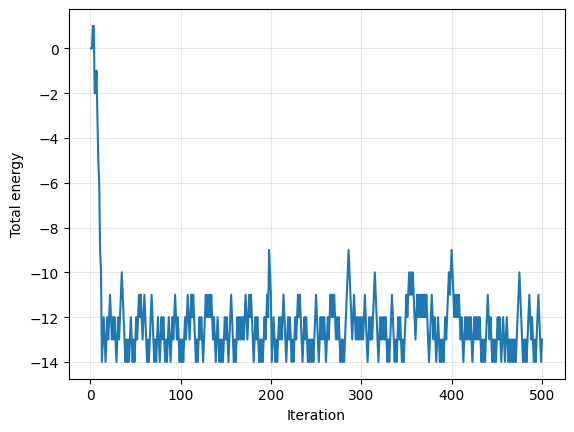

Final sequence: [1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1] or HHPHHHPPHPPHPHPPH
Final energy: -13
Minimum energy: -14


In [32]:
E_structure2, v_structure2 = run_monte_carlo(h_matrix_structure2, s_matrix_structure2, n_iterations=500)

plt.plot(range(1, len(E_structure2) + 1), E_structure2)
plt.xlabel('Iteration')
plt.ylabel('Total energy')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final sequence: {v_structure2} or {''.join(['H' if x else 'P' for x in v_structure2])}")
print(f"Final energy: {E_structure2[-1]}")
print(f"Minimum energy: {min(E_structure2)}")

In [36]:
from scipy.stats import mode

print(f"Modal energy value: {mode(E_structure2)[0]}")

Modal energy value: -13


Note:
1. The final value may change every time you run the simulation due to the inherent randomness of MC simulations. You can introduce a fixed random seed to force reproducibility.
2. The final energy is usually the "modal" (the most frequent) energy value.

# Part B: Exhaustive enumeration

In [ ]:
def exhaustive_enumeration(H, S):
    """
    Performs exhaustive enumeration to find the minimum energy sequence.

    Args:
        H (np.ndarray): The H matrix representing nearest neighbor interactions.
        S (np.ndarray): The S array representing solvation entropy.

    Returns:
        tuple: A tuple containing:
            - np.ndarray: The sequence with minimum energy.
            - float: The minimum energy found.
            - np.ndarray: Array of energies for all sequences.
    """
    n = H.shape[0] # Get the number of positions from the H matrix

    # Generate all possible sequences
    dec_x = np.arange(2**n)
    bin_x = np.array([list(np.binary_repr(x, width=n)) for x in dec_x]).astype(int)

    # Initialize energy array
    E = np.zeros(len(dec_x))

    # Calculate energy for each sequence
    for i in range(len(dec_x)):
        v = bin_x[i]
        E[i] = -np.sum((v @ H) * v) + np.sum(v * S)

    # Find the sequence with minimum energy
    min_index = np.argmin(E)
    min_sequence = bin_x[min_index]
    min_energy = E[min_index]

    return min_sequence, min_energy, E, dec_x

## Structure 1

In [ ]:
# run function
min_sequence_structure1, min_energy_structure1, E_structure1_all, dec_x_structure1 = exhaustive_enumeration(h_matrix_structure1, s_matrix_structure1)
print("Sequence with minimum energy:")
print(''.join(['H' if x else 'P' for x in min_sequence_structure1]))
print(f"Minimum energy: {min_energy_structure1}")

Sequence with minimum energy:
HPPHHHPHPHHHPHHHH
Minimum energy: -10.0


Let's check out the other output variables from the exhaustive enumeration function!

In [ ]:
min_sequence_structure1

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

Above is a binarized representation of the sequence with the lowest energy (H=1 and P=0).

In [ ]:
dec_x_structure1

array([     0,      1,      2, ..., 131069, 131070, 131071])

The array above just verifies that there are in total 131,072 ($2^{17}$) sequences in this space!

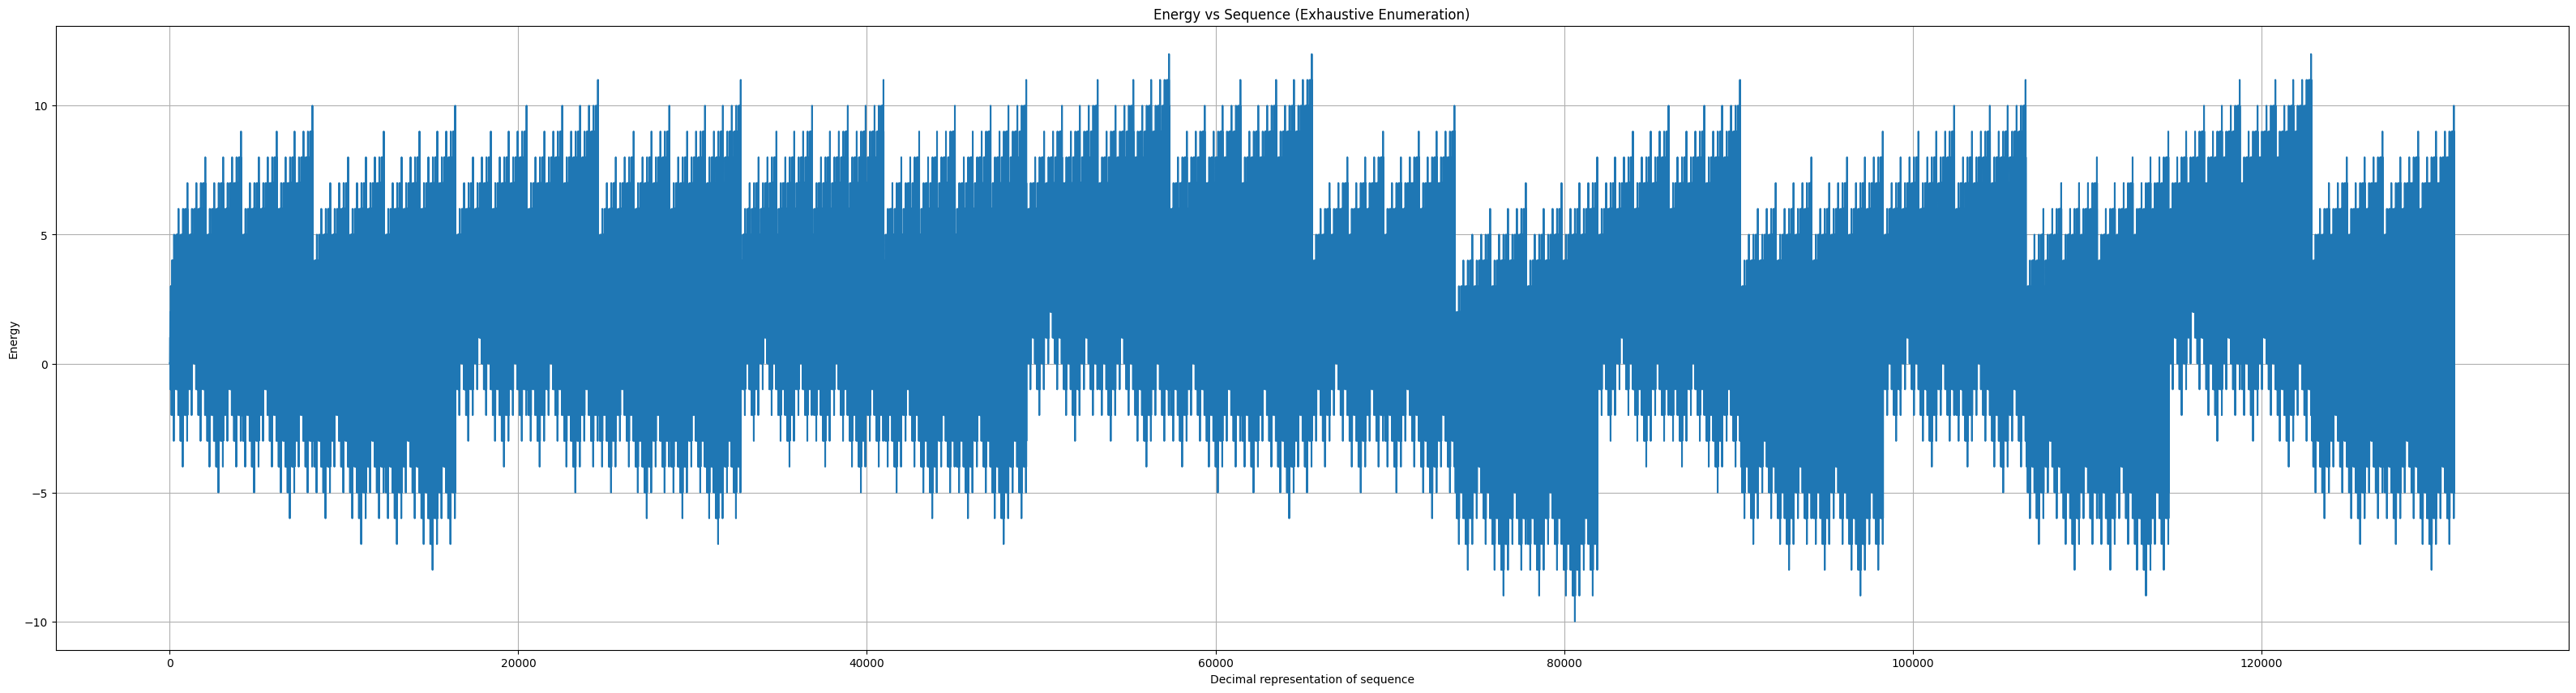

In [ ]:
# Plot the results
plt.figure(figsize=(40, 10))
plt.plot(dec_x_structure1, E_structure1_all)
plt.xlabel('Sequence ID')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

If you would like to know any particular sequence's energy (given the structure), you can:

In [ ]:
seq = [1,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1,1] # H = 1, P = 0
E = -np.sum((seq @ h_matrix_structure1) * seq) + np.sum(seq * s_matrix_structure1)
print(f"Energy of sequence {''.join(['H' if x else 'P' for x in seq])}: {E}")

Energy of sequence HPPHHHPHPHHHPHHHH: -10


## Structure 2

In [ ]:
min_sequence_structure2, min_energy_structure2, E_structure2_all, dec_x_structure2 = exhaustive_enumeration(h_matrix_structure2, s_matrix_structure2)
print("Sequence with minimum energy:")
print(''.join(['H' if x else 'P' for x in min_sequence_structure2]))
print(f"Minimum energy: {min_energy_structure2}")

Sequence with minimum energy:
HPPHHHPPHPPHPHPPH
Minimum energy: -14.0


In [ ]:
min_sequence_structure2

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

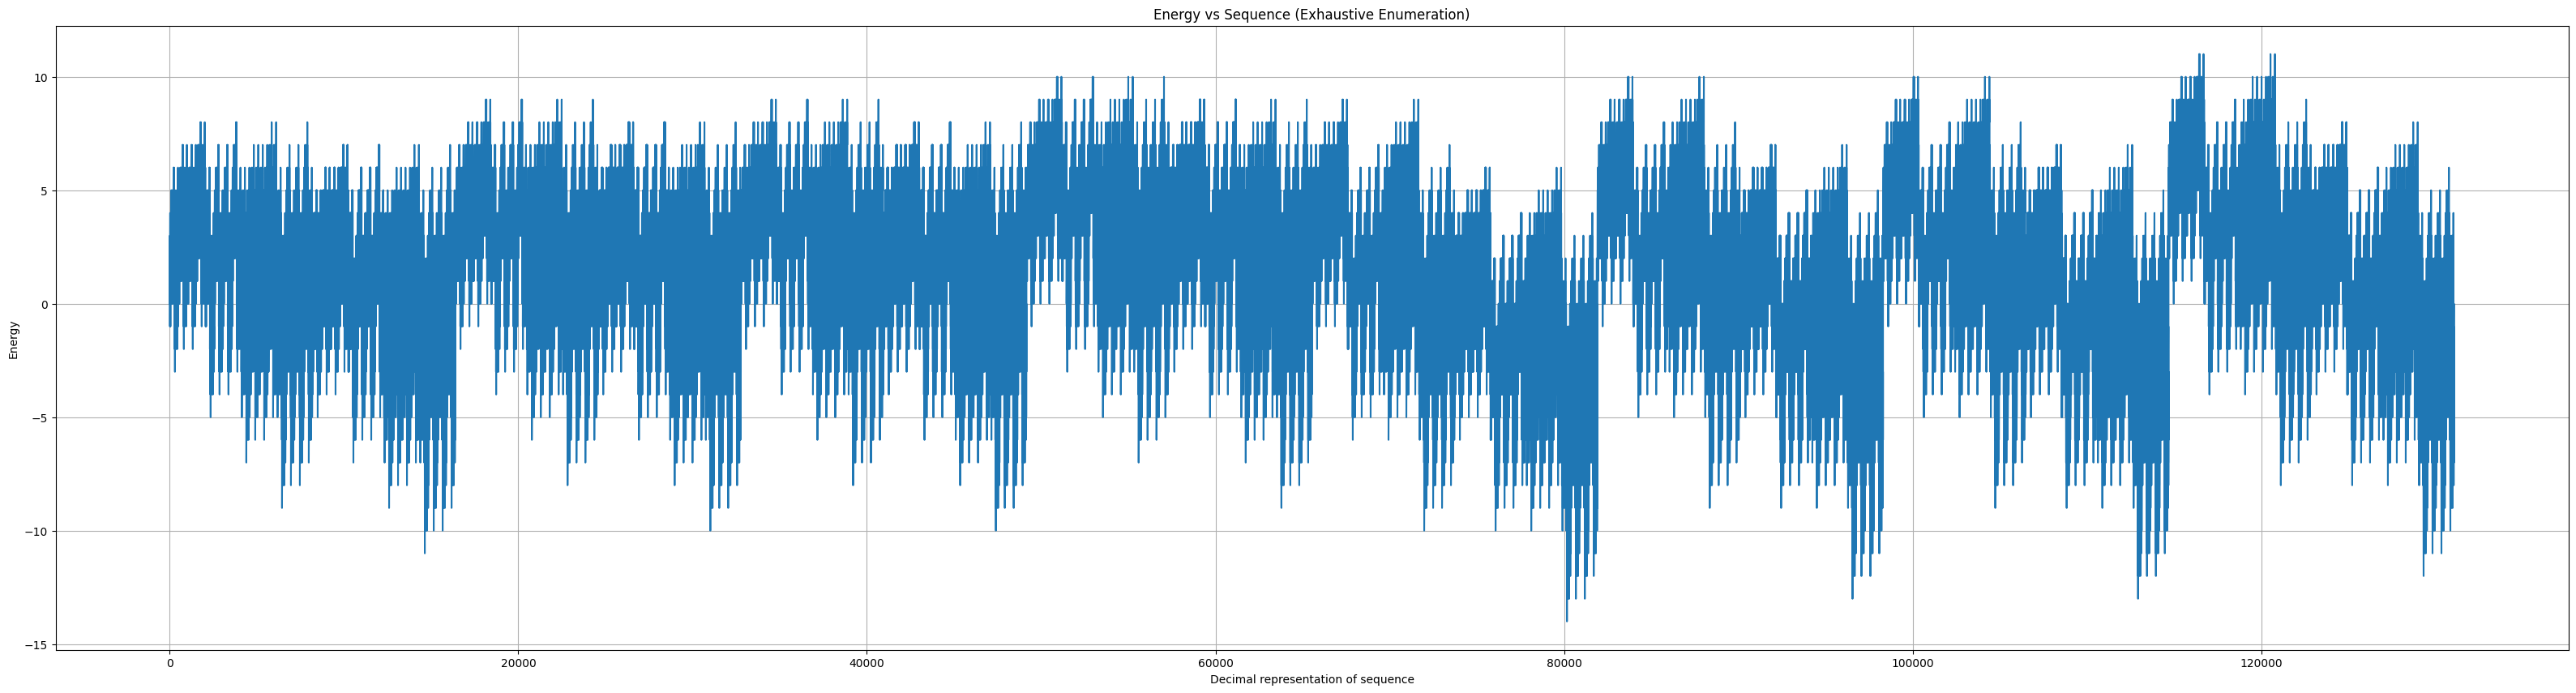

In [ ]:
plt.figure(figsize=(40, 10))
plt.plot(dec_x_structure2, E_structure2_all)
plt.xlabel('Decimal representation of sequence')
plt.ylabel('Energy')
plt.title('Energy vs Sequence (Exhaustive Enumeration)')
plt.grid(True)
plt.show()

# Part C: Reject all attempted moves that lead to an increase in energy

In [ ]:
def run_monte_carlo_no_increase(H, S, n_iterations=500):
    """
    Runs a Monte Carlo simulation that only accepts moves that decrease energy.

    Args:
        H (np.ndarray): The H matrix representing nearest neighbor interactions.
        S (np.ndarray): The S array representing solvation entropy.
        n_iterations (int): The number of Monte Carlo iterations.

    Returns:
        tuple: A tuple containing:
            - list: List of energy values at each accepted iteration.
            - np.ndarray: The final sequence found.
    """
    n = H.shape[0] # Get the number of positions from the H matrix

    # Using random initialization to explore the space better
    v = np.random.randint(0, 2, n)

    # Initialize energy and sequence arrays to store results
    E = [] # To store energy at each accepted step
    V = [] # To store the sequence at each accepted step

    # Calculate and store the initial energy and sequence
    current_energy = -np.sum((v @ H) * v) + np.sum(v * S)
    E.append(current_energy)
    V.append(v.copy())

    # Monte Carlo simulation loop
    ctr = 0 # Counter for attempted iterations
    while ctr < n_iterations:
        ctr += 1
        # Randomly select a position in the sequence to flip
        loc = random.randint(0, n - 1)
        v_new = v.copy() # Create a copy of the current sequence
        v_new[loc] = not v_new[loc] # Flip the amino acid at the selected position (0 to 1 or 1 to 0)

        # Calculate the energy of the new sequence
        new_energy = -np.sum((v_new @ H) * v_new) + np.sum(v_new * S)

        # Check if the new state is accepted (only if energy decreases)
        if new_energy < current_energy:
            current_energy = new_energy # Update the current energy
            v = v_new.copy() # Update the current sequence to the new sequence
            E.append(current_energy) # Append the new energy to the energy list
            V.append(v.copy()) # Append the new sequence to the sequence list
            print(f"Iteration {ctr}: Accepted move, new energy: {current_energy}") # Optional: for debugging

        # If the new state is not accepted, the current state (v) and energy remain the same.

    return E, v # Return the list of energies and the final sequence

## Structure 1

Iteration 1: Accepted move, new energy: 0
Iteration 2: Accepted move, new energy: -1
Iteration 3: Accepted move, new energy: -2
Iteration 6: Accepted move, new energy: -3
Iteration 7: Accepted move, new energy: -5
Iteration 8: Accepted move, new energy: -6
Iteration 10: Accepted move, new energy: -7
Iteration 17: Accepted move, new energy: -8
Iteration 22: Accepted move, new energy: -9
Iteration 44: Accepted move, new energy: -10


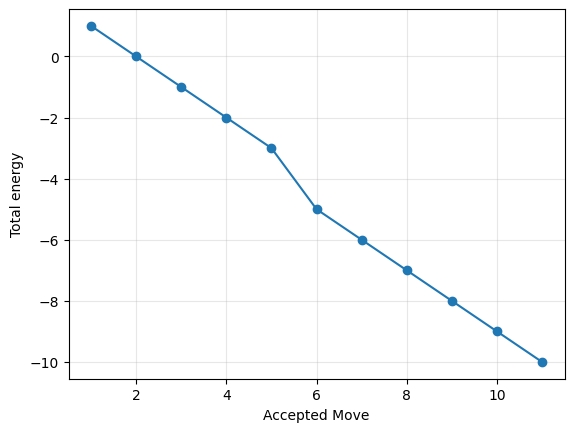

Final sequence (no increase): HPPHHHPHPHHHPHHHH
Final energy (no increase): -10


In [ ]:
# run function
E_no_increase_structure1, v_no_increase_structure1 = run_monte_carlo_no_increase(
    h_matrix_structure1, s_matrix_structure1, n_iterations=100) # change n_iterations to your liking

# Plot results
plt.plot(range(1, len(E_no_increase_structure1) + 1), E_no_increase_structure1, marker='o')
plt.xlabel('Accepted Move')
plt.ylabel('Total energy')
plt.grid(True, alpha=0.3)
plt.show()

# Print final sequence and energy
print(f"Final sequence (no increase): {''.join(['H' if x else 'P' for x in v_no_increase_structure1])}")
print(f"Final energy (no increase): {E_no_increase_structure1[-1]}")

## Structure 2

Iteration 3: Accepted move, new energy: -1
Iteration 6: Accepted move, new energy: -2
Iteration 8: Accepted move, new energy: -4
Iteration 21: Accepted move, new energy: -6
Iteration 30: Accepted move, new energy: -7
Iteration 32: Accepted move, new energy: -8
Iteration 35: Accepted move, new energy: -9
Iteration 39: Accepted move, new energy: -13
Iteration 61: Accepted move, new energy: -14


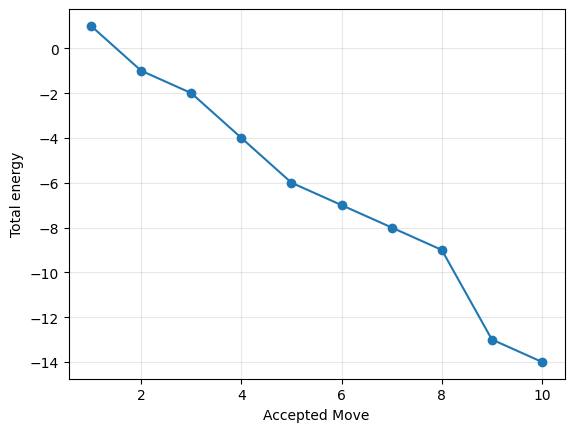

Final sequence (no increase): HPPHHHPPHPPHPHPPH
Final energy (no increase): -14


In [ ]:
E_no_increase_structure2, v_no_increase_structure2 = run_monte_carlo_no_increase(
    h_matrix_structure2, s_matrix_structure2, n_iterations=100)

plt.plot(range(1, len(E_no_increase_structure2) + 1), E_no_increase_structure2, marker='o')
plt.xlabel('Accepted Move')
plt.ylabel('Total energy')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Final sequence (no increase): {''.join(['H' if x else 'P' for x in v_no_increase_structure2])}")
print(f"Final energy (no increase): {E_no_increase_structure2[-1]}")

These results will fluctuate every time you run the cell, unless you specify a random seed!

# Bonus D: Minimum energy protein structure prediction
$ P(\text{structure}|\text{sequence}) $, i.e., structure prediction

## Structure 1

First, initialize the exhaustive enumeration conditions globally

In [12]:
n = 17  # Length of the protein sequence

# Initialize a larger grid to avoid boundary issues for larger n if needed
map_grid = np.zeros((2 * n + 1, 2 * n + 1)) # Grid to represent the 2D space, initialized with zeros

ctr = 1 # Counter for the number of generated structures

# Initial sequence: starts with two residues placed on the grid
# Placing the initial residues near the center of the grid
initial_seq = np.array([[n, n + 1], [n + 1, n + 1]]) # Adjusted initial position
seq = initial_seq.copy()

stru_min = [] # To store the structure with the minimum energy found

E_min = 100 # Initialize minimum energy with a high value

# Place the initial two residues on the grid
map_grid[seq[0, 0], seq[1, 0]] = 1
map_grid[seq[0, 1], seq[1, 1]] = 2

# prot is the protein sequence representing hydrophobicity (1 for H, 0 for P) for Structure 1
# This protein sequence should match the structure being analyzed (Structure 1 in this case)
prot = np.array([1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

Then, define the search function

NOTE: Equation to calculate the energy is different from above (i.e., no longer sampling from the Boltzman distribution) since we are dealing with the protein structure, not the sequence.

In [4]:
def fcn1(dir, current_length, current_loc, map_grid):
    """
    Recursively explores possible protein structures on a 2D grid using a depth-first search approach.

    Args:
        dir (int): The direction of the current step (1: up, 2: right, 3: down, 4: left).
        current_length (int): The current length of the protein sequence being built.
        current_loc (np.ndarray): The grid coordinates of the last added residue [row, column].
        map_grid (np.ndarray): The current state of the grid, marking occupied positions.
    """
    global ctr, E_min, stru_min, seq, n, prot  # Declare global variables used/modified in the function

    loc = np.array([0, 0])
    r, c = current_loc # Get the row and column of the current location

    # Determine the next location based on the direction
    if dir == 1: # Up
        loc = np.array([r - 1, c])
    elif dir == 2: # Right
        loc = np.array([r, c + 1])
    elif dir == 3: # Down
        loc = np.array([r + 1, c])
    elif dir == 4: # Left
        loc = np.array([r, c - 1])
    else:
        print('Error with direction')
        return

    # Check if the next location is valid (within grid bounds and not already occupied)
    if loc[0] < 0 or loc[0] >= 2 * n + 1 or loc[1] < 0 or loc[1] >= 2 * n + 1 or map_grid[loc[0], loc[1]] != 0:
        return # If invalid, stop this path of exploration
    else:
        # If valid, place the residue on the grid and add its location to the sequence
        map_grid[loc[0], loc[1]] = current_length + 1 # Mark grid with the residue index (1-based)
        seq = np.column_stack((seq, loc))

        # If the structure is not yet complete (current_length + 1 < n)
        if current_length + 1 < n:
            # Recursively call fcn1 for all possible next directions
            for new_dir in range(1, 5):
                # Avoid reversing immediately back to the previous position
                if not (new_dir == 1 and dir == 3) and \
                   not (new_dir == 3 and dir == 1) and \
                   not (new_dir == 2 and dir == 4) and \
                   not (new_dir == 4 and dir == 2):
                   fcn1(new_dir, current_length + 1, loc, map_grid)
            # Backtrack: remove the last added residue from the grid and sequence to explore other paths
            map_grid[loc[0], loc[1]] = 0
            seq = seq[:, :-1]
        else:
            # A complete structure of length n has been formed
            # Calculate the energy of the current structure
            current_energy = 0

            # Iterate through each residue in the sequence
            for i in range(n):
                r_i, c_i = seq[:, i]
                # If the current residue is hydrophobic (prot[i] == 1)
                if prot[i] == 1:
                    # Check for hydrophobic-hydrophobic interactions with non-adjacent neighbors
                    neighbors = [(r_i - 1, c_i), (r_i + 1, c_i), (r_i, c_i - 1), (r_i, c_i + 1)]
                    for r_j, c_j in neighbors:
                        # Check if neighbor is within grid bounds
                        if 0 <= r_j < 2*n+1 and 0 <= c_j < 2*n+1:
                            neighbor_residue_index = map_grid[r_j, c_j]
                            # Check if the neighbor position is occupied and is not the immediately adjacent residues in sequence
                            if neighbor_residue_index != 0 and neighbor_residue_index != i + 2 and neighbor_residue_index != i:
                                # Check if the neighbor residue is also hydrophobic
                                if prot[int(neighbor_residue_index) - 1] == 1:
                                    current_energy -= 1 # Count hydrophobic-hydrophobic contact

                    # Check for hydrophobic residues exposed to the solvent (grid value is 0)
                    solvent_exposed = False
                    for r_j, c_j in neighbors:
                         if 0 <= r_j < 2*n+1 and 0 <= c_j < 2*n+1 and map_grid[r_j, c_j] == 0:
                             solvent_exposed = True
                             break
                    if solvent_exposed:
                         current_energy += 1 # Count hydrophobic-solvent contact

            # Update minimum energy and structure if the current structure has lower energy
            if current_energy < E_min:
                E_min = current_energy
                stru_min = seq.copy() # Store a copy of the minimum energy structure
                # print(f"Found new minimum energy: {E_min}") # Optional: for debugging

            # Backtrack: remove the last added residue from the grid and sequence for further exploration
            map_grid[loc[0], loc[1]] = 0
            ctr += 1 # Increment the counter for complete structures found
            seq = seq[:, :-1]

Then, run the search and show the results

Total runtime: 466 seconds.
Total structures explored (ctr): 4311334
Minimum energy found (E_min): -11
Structure with minimum energy (stru_min): [[17 18 18 17 16 15 14 14 14 15 15 16 17 17 16 16 15]
 [18 18 19 19 19 19 19 18 17 17 16 16 16 17 17 18 18]]
Protein sequence: [1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1]


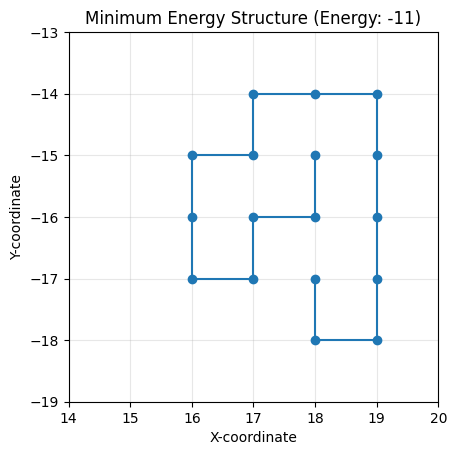

In [13]:
# Start timing the execution
start_time = time.time()

# Call the recursive function to start exploring structures
# Start from the second residue (index 1 in initial_seq) and explore in three directions (East, South, West)
# The initial two residues are fixed, so we start building from the third residue (current_length = 2)
# The initial moves are relative to the second residue's position (initial_seq[:, 1])
fcn1(2, 2, initial_seq[:, 1], map_grid)  # Explore starting by moving East from the second residue
fcn1(3, 2, initial_seq[:, 1], map_grid)  # Explore starting by moving South from the second residue
fcn1(4, 2, initial_seq[:, 1], map_grid)  # Explore starting by moving West from the second residue

# Calculate and print the runtime
elapsed_time = time.time() - start_time
print(f"Total runtime: {int(elapsed_time)} seconds.")

# Print the results
print("Total structures explored (ctr):", ctr) # Total number of structures explored
print("Minimum energy found (E_min):", E_min) # Minimum energy found
print("Structure with minimum energy (stru_min):", stru_min) # Coordinates of the minimum energy structure
print("Protein sequence:", prot) # The protein sequence used

# Plot the minimum energy structure
if len(stru_min) > 0:
    plt.figure()
    # Plot the structure using the stored coordinates, flipping the y-axis for visualization
    plt.plot(stru_min[1, :], -stru_min[0, :], '-o')
    # Set the axis limits and labels
    plt.xlim(14, 20)
    plt.ylim(-19, -13)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(f"Minimum Energy Structure (Energy: {E_min})")
    plt.grid(True, alpha=0.3)
    plt.gca().set_aspect('equal', adjustable='box') # Ensure equal scaling of axes
    plt.show()
else:
    print("No structure found (possibly due to very small grid or other constraints).")

We can see that the predicted structure of this sequences is NOT identical to the given Structure 1 in the Problem set.

This means that the sequence we found in Part A for a protein with Structure 1 has an alternative, truly minimized structure (found here). Structure 1 is actually this sequence's "metastable" state.

Note on computational efficiency:

Exhaustive enumeration of protein structures is computationally very expensive,
as the number of possible structures grows exponentially with the protein length.
For longer sequences, Monte Carlo methods (like the Metropolis algorithm shown earlier)
or other approximation techniques are necessary to explore the vast conformational space.

## Structure 2

Re-initialize the protein sequence for structure 2

In [9]:
# MUST RUN THIS CELL SINCE fcn1() OVERWRITES GLOBAL VARIABLES
n = 17

map_grid = np.zeros((2 * n + 1, 2 * n + 1))

ctr = 1

initial_seq = np.array([[n, n + 1], [n + 1, n + 1]])
seq = initial_seq.copy()

stru_min = []

E_min = 100

map_grid[seq[0, 0], seq[1, 0]] = 1
map_grid[seq[0, 1], seq[1, 1]] = 2

prot = np.array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

Total runtime: 215 seconds.
Total structures explored (ctr): 2985989
Minimum energy found (E_min): -14
Structure with minimum energy (stru_min): [[17 18 18 17 16 16 16 15 15 14 14 15 15 16 16 17 17]
 [18 18 19 19 19 18 17 17 18 18 19 19 20 20 21 21 20]]
Protein sequence: [1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1]


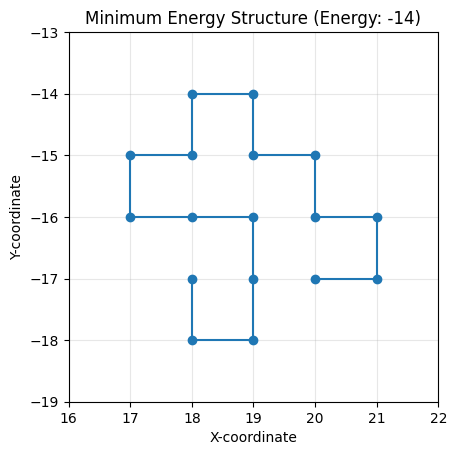

In [11]:
start_time = time.time()

fcn1(2, 2, initial_seq[:, 1], map_grid)
fcn1(3, 2, initial_seq[:, 1], map_grid)
fcn1(4, 2, initial_seq[:, 1], map_grid)

elapsed_time = time.time() - start_time
print(f"Total runtime: {int(elapsed_time)} seconds.")

print("Total structures explored (ctr):", ctr)
print("Minimum energy found (E_min):", E_min)
print("Structure with minimum energy (stru_min):", stru_min)
print("Protein sequence:", prot)

if len(stru_min) > 0:
    plt.figure()
    plt.plot(stru_min[1, :], -stru_min[0, :], '-o')
    plt.xlim(16, 22)
    plt.ylim(-19, -13)
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(f"Minimum Energy Structure (Energy: {E_min})")
    plt.grid(True, alpha=0.3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
else:
    print("No structure found (possibly due to very small grid or other constraints).")

Structure 2 actually is the minimized state of the sequence we found in Part A!

(Since the structure we found here can be made into the given Structure 2 by a simple reflection on the `y=-16` axis.)